<a href="https://colab.research.google.com/github/gmkumar1988/Cluster-Analysis/blob/main/Netflix_Stock_Price_Prediction_Using_Linear_Regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
netflix = pd.read_csv('/content/Netflix_stock_history.csv')
netflix.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-05-23 00:00:00-04:00,1.156429,1.242857,1.145714,1.196429,104790000,0.0,0.0
1,2002-05-24 00:00:00-04:00,1.214286,1.225000,1.197143,1.210000,11104800,0.0,0.0
2,2002-05-28 00:00:00-04:00,1.213571,1.232143,1.157143,1.157143,6609400,0.0,0.0
3,2002-05-29 00:00:00-04:00,1.164286,1.164286,1.085714,1.103571,6757800,0.0,0.0
4,2002-05-30 00:00:00-04:00,1.107857,1.107857,1.071429,1.071429,10154200,0.0,0.0


In [4]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5742 entries, 0 to 5741
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5742 non-null   object 
 1   Open          5742 non-null   float64
 2   High          5742 non-null   float64
 3   Low           5742 non-null   float64
 4   Close         5742 non-null   float64
 5   Volume        5742 non-null   int64  
 6   Dividends     5742 non-null   float64
 7   Stock Splits  5742 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 359.0+ KB


In [5]:
netflix.describe(include='all')

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,5742,5742.000000,5742.000000,5742.000000,5742.000000,5.742000e+03,5742.0,5742.000000
unique,5742,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2025-03-18 00:00:00-04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,163.294099,165.693441,160.827570,163.316718,1.526542e+07,0.0,0.001567
std,NaN,216.569162,219.422490,213.566430,216.531357,1.843426e+07,0.0,0.096070
min,NaN,0.377857,0.410714,0.346429,0.372857,2.856000e+05,0.0,0.000000
25%,NaN,4.273214,4.357143,4.192143,4.267857,5.452125e+06,0.0,0.000000
50%,NaN,45.561428,46.735714,44.882856,45.871428,9.498200e+06,0.0,0.000000
75%,NaN,310.284988,316.412491,304.647491,310.837494,1.816815e+07,0.0,0.000000


Checking for Null values

In [6]:
netflix.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0
Dividends,0
Stock Splits,0


In [7]:
netflix.duplicated().sum()

np.int64(0)

In [13]:
netflix.shape

(5742, 8)

In [14]:
netflix.size

45936

In [15]:
netflix.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')

In [8]:
netflix.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-05-23 00:00:00-04:00,1.156429,1.242857,1.145714,1.196429,104790000,0.0,0.0
1,2002-05-24 00:00:00-04:00,1.214286,1.225000,1.197143,1.210000,11104800,0.0,0.0
2,2002-05-28 00:00:00-04:00,1.213571,1.232143,1.157143,1.157143,6609400,0.0,0.0
3,2002-05-29 00:00:00-04:00,1.164286,1.164286,1.085714,1.103571,6757800,0.0,0.0
4,2002-05-30 00:00:00-04:00,1.107857,1.107857,1.071429,1.071429,10154200,0.0,0.0


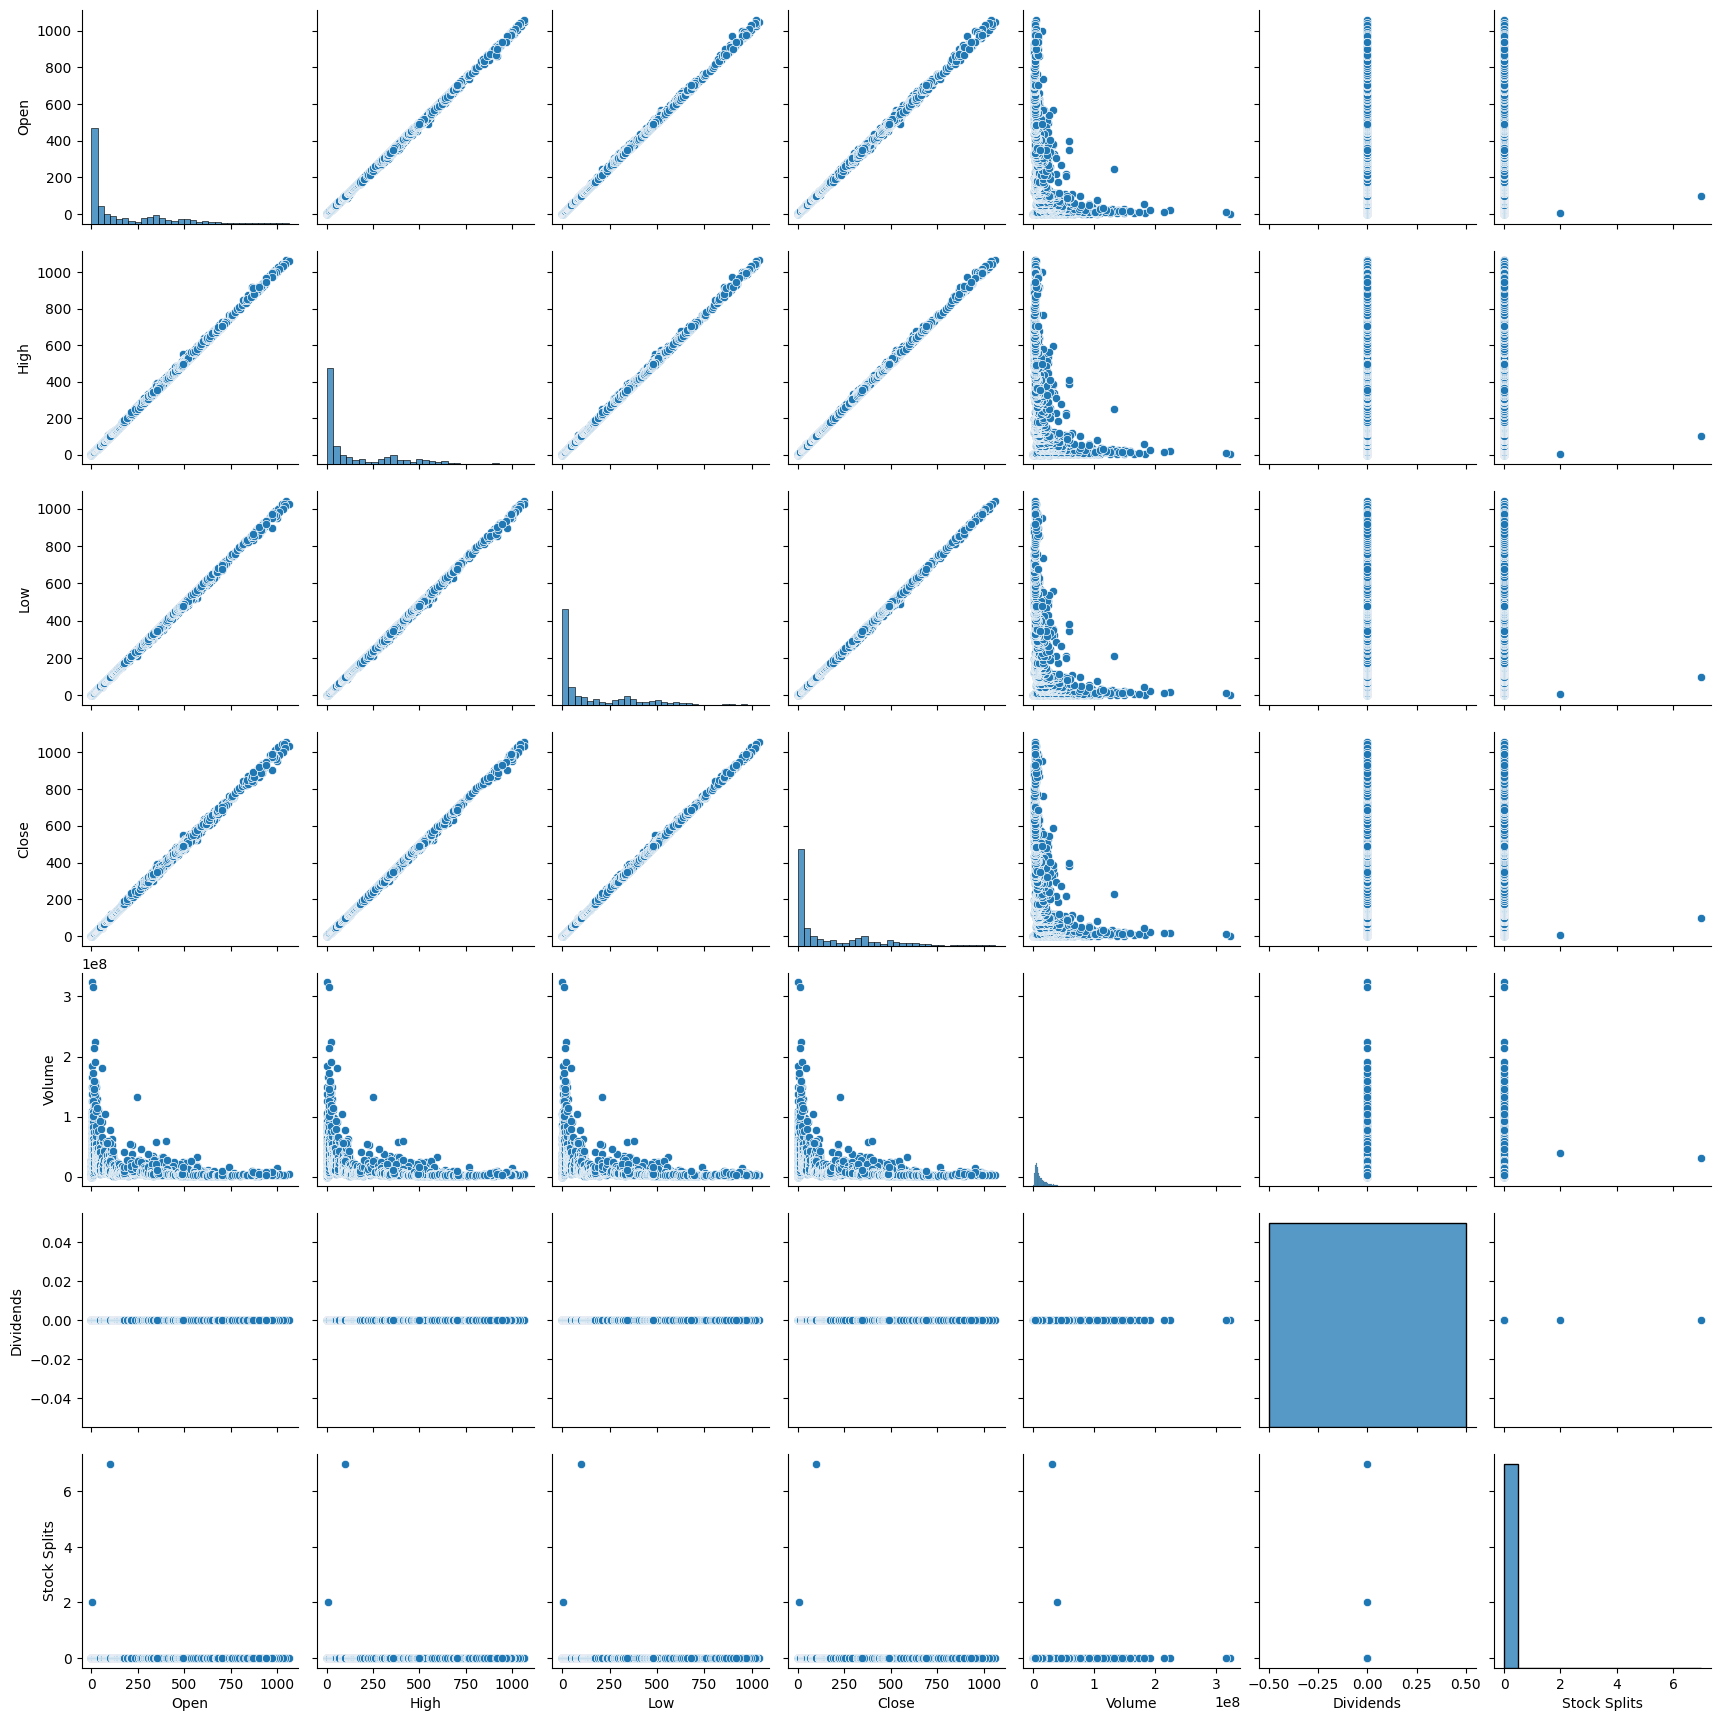

In [10]:
sns.pairplot(netflix)
plt.show()

ValueError: could not convert string to float: '2002-05-23 00:00:00-04:00'

In [19]:
X = netflix[['Open', 'High', 'Low','Volume']].values
y = netflix['Close'].values

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
# split train and test data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [25]:
lm.coef_

array([-5.58222782e-01,  7.61149562e-01,  7.97918288e-01,  1.12868415e-09])

In [27]:
#values from 0 to 1
#0 model explain None of the variability
#1 model explain Entire of the variability
lm.score(x_train, y_train)

0.9998916397540204

Run models using Test data

In [28]:
predictions = lm.predict(x_test)

In [29]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [30]:
r2score = r2_score(y_test, predictions)
r2score

0.999911035537829

In [31]:
dframe=pd.DataFrame({'actual':y_test.flatten(),'Predicted':predictions.flatten()})

In [33]:
dframe.head(15)

,actual,Predicted
0,2.095714,2.125923
1,47.818569,48.717164
2,541.450012,553.386744
3,93.110001,92.237910
4,108.379997,108.854825
5,4.107143,4.120573
6,16.572857,16.863056
7,68.475716,68.502153
8,1.123571,1.161702
9,36.751431,36.452543


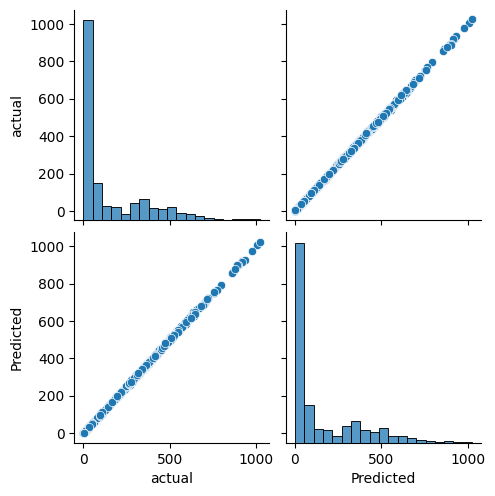

In [34]:
# Plotting the graph
sns.pairplot(dframe)
plt.show()

Bar Plot

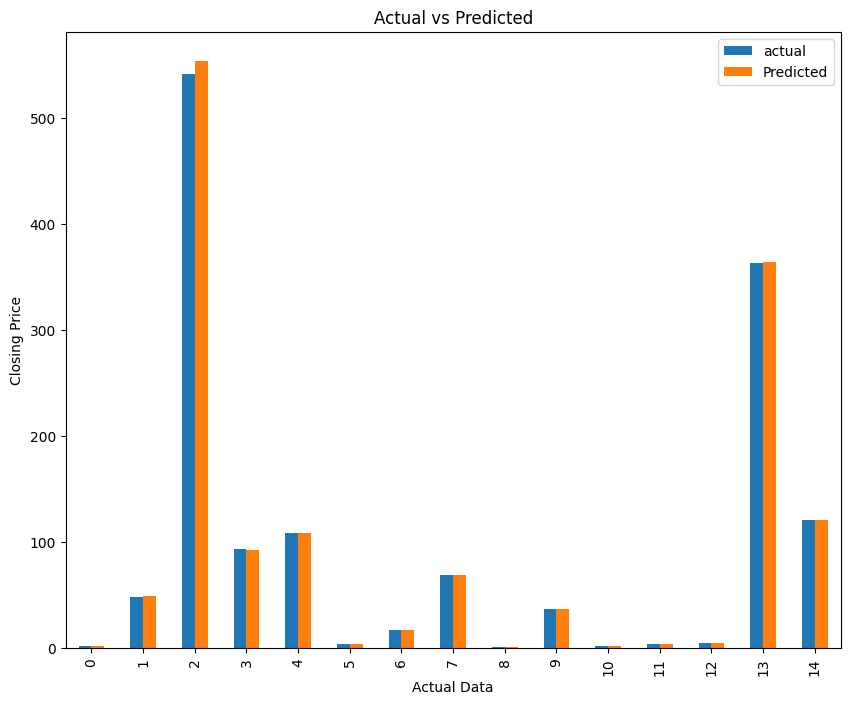

In [37]:
graph = dframe.head(15)
graph.plot(kind='bar',figsize=(10,8))
plt.title("Actual vs Predicted")
plt.xlabel("Actual Data")
plt.ylabel("Closing Price")
plt.show()

Text(0, 0.5, 'Predicted')

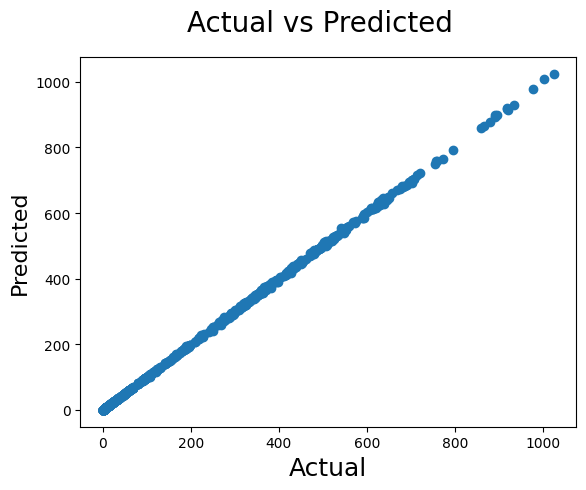

In [38]:
fig = plt.figure()
plt.scatter(y_test, predictions)
fig.suptitle('Actual vs Predicted', fontsize=20)               # Plot heading
plt.xlabel('Actual', fontsize=18)                               # X-label
plt.ylabel('Predicted', fontsize=16)

Text(0, 0.5, 'Predicted')

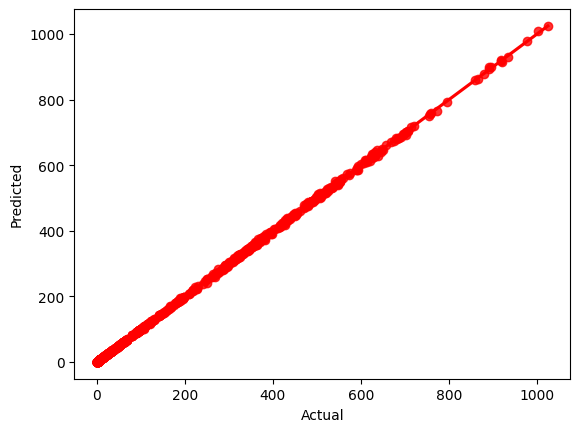

In [39]:
sns.regplot(x=y_test,y=predictions,ci=None,color ='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [40]:
import math
from sklearn import metrics

In [41]:
print ("Mean absolute error ", mean_absolute_error(y_test, predictions))
print ("Mean squared error ", mean_squared_error(y_test, predictions))
print ("Root mean squared error ", math.sqrt(mean_squared_error(y_test, predictions)))

Mean absolute error  0.9825119710919608
Mean squared error  3.983435973777572
Root mean squared error  1.995854697561316



MAE	0.98	On average, your model's predictions are off by about 0.98 units from the actual values. This is a direct, intuitive measure of error.
MSE	3.98	The average of the squared errors. This penalizes larger errors more heavily, so it suggests that some predictions may be significantly off.
RMSE	1.99	The square root of MSE, bringing the error back to the original unit. It indicates that, on average, predictions deviate from actual values by about 1.99 units.
